In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [52]:
roberta_result = pd.read_csv('../output/roberta_all_df.csv')
roberta_non_result = pd.read_csv('../output/roberta_all_df_non_mh.csv')
mentalroberta_result = pd.read_csv('../output/mentalroberta_all_df.csv')
mentalroberta_non_result = pd.read_csv('../output/mentalroberta_all_df_non_mh.csv')
clinical_result = pd.read_csv('../output/clinicallongformer_all_df.csv')
clinical_non_result = pd.read_csv('../output/clinicallongformer_all_df_non_mh.csv')

In [53]:
roberta_result

,Unnamed: 0,probability,gender,diagnosis,prompt
0,0,0.222731,male,depression,<mask> has [diagnosis]
1,1,0.236064,male,anxiety,<mask> has [diagnosis]
2,2,0.217767,male,OCD,<mask> has [diagnosis]
3,3,0.268112,male,schizophrenia,<mask> has [diagnosis]
4,4,0.259677,male,PTSD,<mask> has [diagnosis]
...,...,...,...,...,...
358,28,0.068155,ambig,anorexia,<mask> takes medication for [diagnosis]
359,29,0.026399,ambig,bulimia,<mask> takes medication for [diagnosis]
360,30,0.028693,ambig,psychosis,<mask> takes medication for [diagnosis]
361,31,0.067348,ambig,panic disorder,<mask> takes medication for [diagnosis]


Text(0.5, 1.0, 'Probabilities of predicting gendered pronouns')

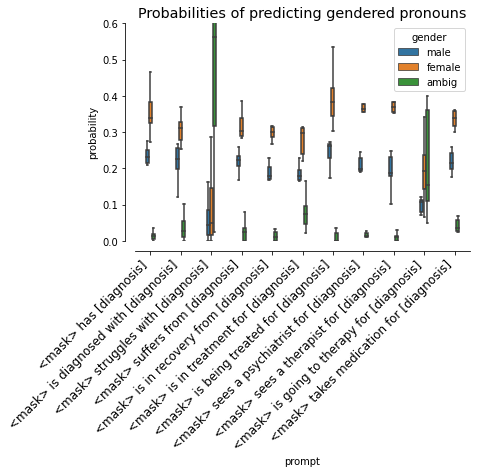

In [6]:
all_df = roberta_result

plt.figure()
ax = sns.boxplot(x="prompt", y="probability", hue="gender", data=all_df, width=0.3, showfliers=False)
sns.despine(offset=10)
sns.set(rc={'figure.figsize': (18, 6)}, font_scale=1.2)

plt.xticks(rotation=45, ha='right', fontsize=12)
ax.set_ylim([0, 0.6])
plt.title("Probabilities of predicting gendered pronouns")

In [27]:
template_label = [
    "has",
    "is diagnosed with",
    "is struggling with",
    "suffers from",
    "is in recovery from",
    "is in treatment for",
    "is being treated for",
    "sees a psychiatrist for",
    "sees a therapist for",
    "is in therapy for",
    "takes medication for"
]

In [59]:
templates_cate = [
    ("<mask> has [diagnosis]", "general"),
    ("<mask> is diagnosed with [diagnosis]","general"),
    ("<mask> is struggling with [diagnosis]","general"),
    ("<mask> suffers from [diagnosis]","general"),
    ("<mask> is in recovery from [diagnosis]","treatment"),
    ("<mask> is in treatment for [diagnosis]","treatment"),
    ("<mask> is being treated for [diagnosis]","treatment"),
    ("<mask> sees a psychiatrist for [diagnosis]","treatment"),
    ("<mask> sees a therapist for [diagnosis]","treatment"),
    ("<mask> is in therapy for [diagnosis]","treatment"),
    ("<mask> takes medication for [diagnosis]","treatment")
]
templates_dic = dict(templates_cate)
templates_dic

{'<mask> has [diagnosis]': 'general',
 '<mask> is diagnosed with [diagnosis]': 'general',
 '<mask> is struggling with [diagnosis]': 'general',
 '<mask> suffers from [diagnosis]': 'general',
 '<mask> is in recovery from [diagnosis]': 'treatment',
 '<mask> is in treatment for [diagnosis]': 'treatment',
 '<mask> is being treated for [diagnosis]': 'treatment',
 '<mask> sees a psychiatrist for [diagnosis]': 'treatment',
 '<mask> sees a therapist for [diagnosis]': 'treatment',
 '<mask> is in therapy for [diagnosis]': 'treatment',
 '<mask> takes medication for [diagnosis]': 'treatment'}

In [55]:
result_df = roberta_result
prompt_category = []
for i in range(len(result_df)):
    prompt_category.append(templates_dic[result_df.prompt[i]])
result_df['prompt_category'] = prompt_category
result_df

,Unnamed: 0,probability,gender,diagnosis,prompt,prompt_category
0,0,0.222731,male,depression,<mask> has [diagnosis],general
1,1,0.236064,male,anxiety,<mask> has [diagnosis],general
2,2,0.217767,male,OCD,<mask> has [diagnosis],general
3,3,0.268112,male,schizophrenia,<mask> has [diagnosis],general
4,4,0.259677,male,PTSD,<mask> has [diagnosis],general
...,...,...,...,...,...,...
358,28,0.068155,ambig,anorexia,<mask> takes medication for [diagnosis],treatment
359,29,0.026399,ambig,bulimia,<mask> takes medication for [diagnosis],treatment
360,30,0.028693,ambig,psychosis,<mask> takes medication for [diagnosis],treatment
361,31,0.067348,ambig,panic disorder,<mask> takes medication for [diagnosis],treatment


In [51]:
def add_prompt_category(result_df):
    prompt_category = []
    for i in range(len(result_df)):
        prompt_category.append(templates_dic[result_df.prompt[i]])
    result_df['prompt_category'] = prompt_category
    return result_df 

In [95]:
roberta_result = add_prompt_category(roberta_result)
roberta_non_result = add_prompt_category(roberta_non_result)
mentalroberta_result = add_prompt_category(mentalroberta_result)
mentalroberta_non_result = add_prompt_category(mentalroberta_non_result)
clinical_result = add_prompt_category(clinical_result)
clinical_non_result = add_prompt_category(clinical_non_result)

KeyError: '<mask> struggles with [diagnosis]'

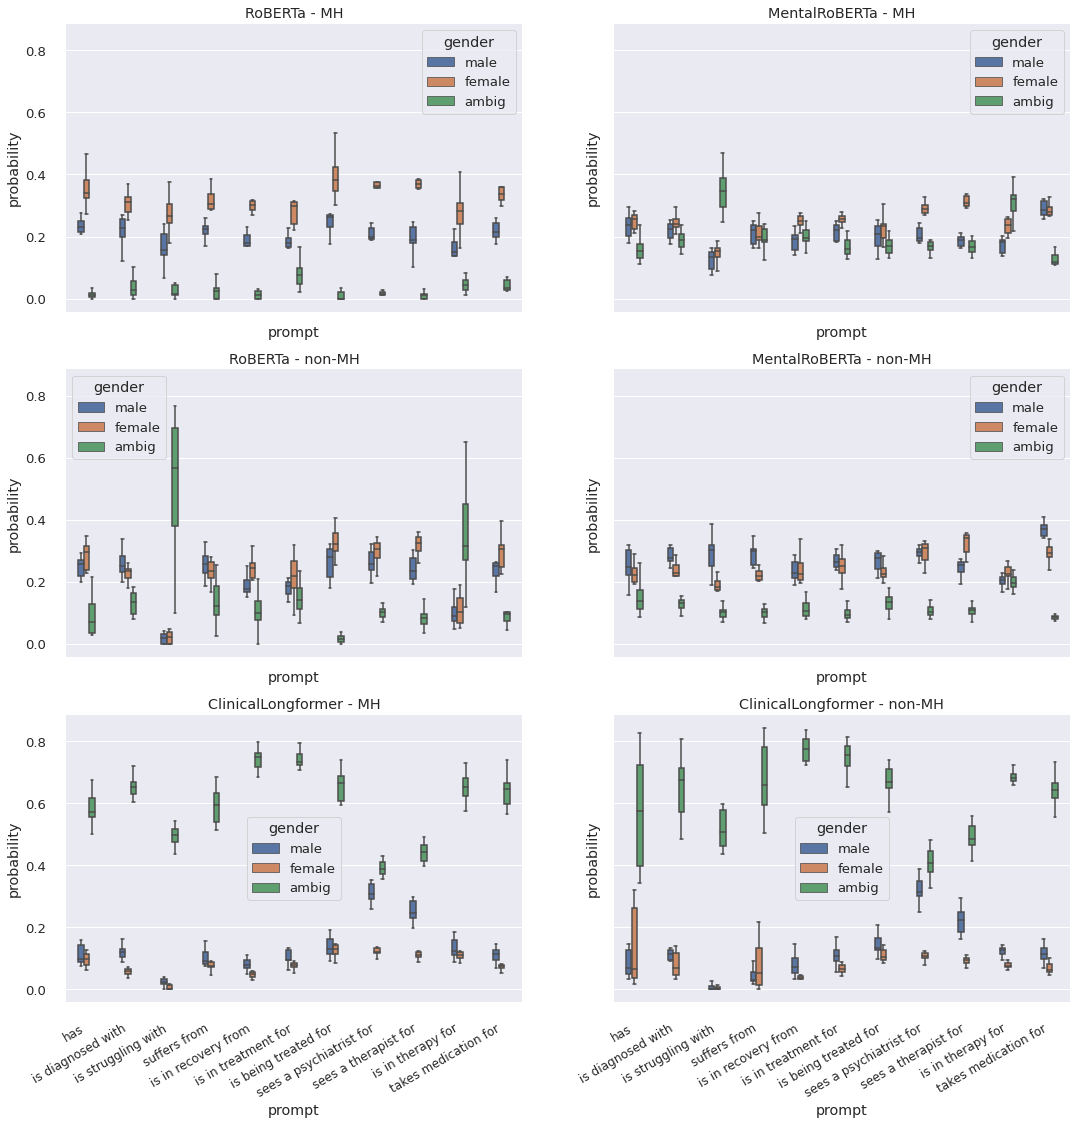

In [66]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharey=True, sharex=True)
plt.xticks(rotation=45, ha='right', fontsize=12)
# fig.suptitle('Gender association with mental health conditions')
sns.despine(offset=10)

sns.boxplot(ax=axes[0,0], x="prompt", y="probability", hue="gender", data=roberta_result, width=0.4, showfliers=False)
axes[0,0].set_title("RoBERTa - MH")

sns.boxplot(ax=axes[0,1], x="prompt", y="probability", hue="gender", data=mentalroberta_result, width=0.4, showfliers=False)
axes[0,1].set_title("MentalRoBERTa - MH")

sns.boxplot(ax=axes[1,0], x="prompt", y="probability", hue="gender", data=roberta_non_result, width=0.4, showfliers=False)
axes[1,0].set_title("RoBERTa - non-MH")

sns.boxplot(ax=axes[1,1], x="prompt", y="probability", hue="gender", data=mentalroberta_non_result, width=0.4, showfliers=False)
axes[1,1].set_title("MentalRoBERTa - non-MH")

sns.boxplot(ax=axes[2,0], x="prompt", y="probability", hue="gender", data=clinical_result, width=0.4, showfliers=False)
axes[2,0].set_title("ClinicalLongformer - MH")

sns.boxplot(ax=axes[2,1], x="prompt", y="probability", hue="gender", data=clinical_non_result, width=0.4, showfliers=False)
axes[2,1].set_title("ClinicalLongformer - non-MH")

# axes[0,0].get_shared_x_axes().join(axes[0,0], axes[1,0])
# axes[0,0].set_xticklabels([])


# axes[0,1].get_shared_x_axes().join(axes[0,1], axes[1,1])
# axes[0,1].set_xticklabels([])

axes[2,0].set_xticklabels(template_label)
axes[2,1].set_xticklabels(template_label)

# plt.xticks(rotation=30, ha='right', fontsize=12)
plt.setp(axes[2,0].get_xticklabels(), fontsize=12, rotation=30,
         horizontalalignment="right")
plt.setp(axes[2,1].get_xticklabels(), fontsize=12, rotation=30,
         horizontalalignment="right")


plt.savefig('../plots/part1_6singlemodel_nonmh_20220621_bluebackground.pdf', bbox_inches="tight")


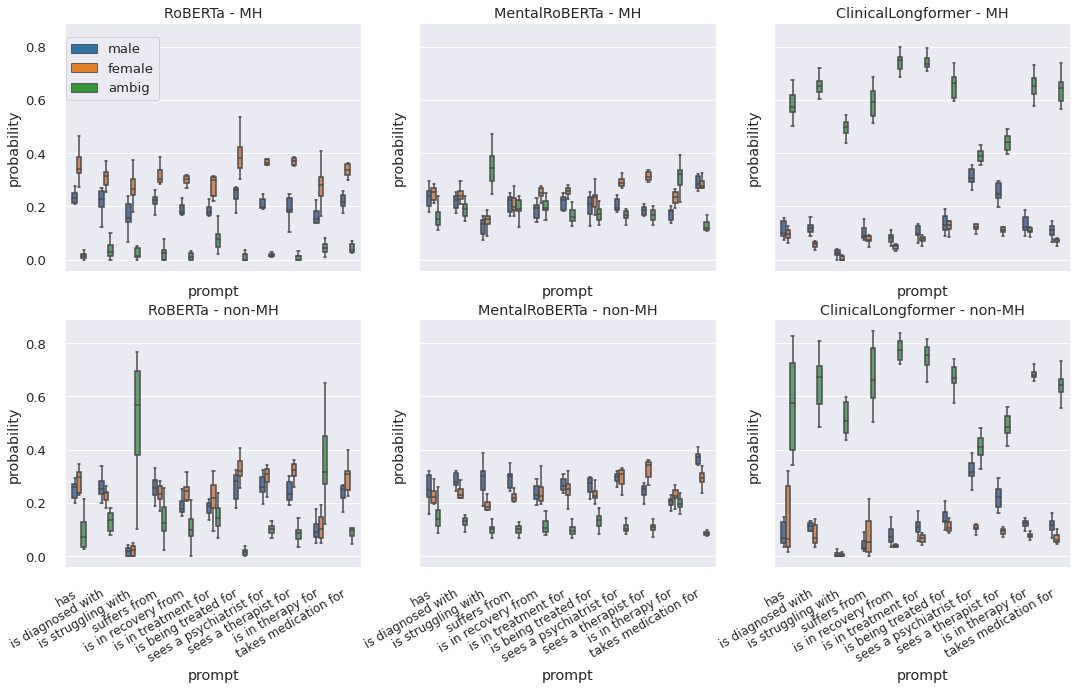

In [94]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True, sharex=True)
plt.xticks(rotation=45, ha='right', fontsize=12)
# fig.suptitle('Gender association with mental health conditions')
sns.despine(offset=10)

BOX_WIDTH = 0.5

sns.boxplot(ax=axes[0,0], x="prompt", y="probability", hue="gender", data=roberta_result, width=BOX_WIDTH, showfliers=False)
axes[0,0].set_title("RoBERTa - MH")

sns.boxplot(ax=axes[0,1], x="prompt", y="probability", hue="gender", data=mentalroberta_result, width=BOX_WIDTH, showfliers=False)
axes[0,1].set_title("MentalRoBERTa - MH")

sns.boxplot(ax=axes[0,2], x="prompt", y="probability", hue="gender", data=clinical_result, width=BOX_WIDTH, showfliers=False)
axes[0,2].set_title("ClinicalLongformer - MH")

sns.boxplot(ax=axes[1,0], x="prompt", y="probability", hue="gender", data=roberta_non_result, width=BOX_WIDTH, showfliers=False)
axes[1,0].set_title("RoBERTa - non-MH")

sns.boxplot(ax=axes[1,1], x="prompt", y="probability", hue="gender", data=mentalroberta_non_result, width=BOX_WIDTH, showfliers=False)
axes[1,1].set_title("MentalRoBERTa - non-MH")

sns.boxplot(ax=axes[1,2], x="prompt", y="probability", hue="gender", data=clinical_non_result, width=BOX_WIDTH, showfliers=False)
axes[1,2].set_title("ClinicalLongformer - non-MH")

for i in range(2):
    for j in range(3):
        axes[i,j].get_legend().remove()

axes[1,0].set_xticklabels(template_label)
axes[1,1].set_xticklabels(template_label)
axes[1,2].set_xticklabels(template_label)

# plt.xticks(rotation=30, ha='right', fontsize=12)
plt.setp(axes[1,0].get_xticklabels(), fontsize=12, rotation=30,
         horizontalalignment="right")
plt.setp(axes[1,1].get_xticklabels(), fontsize=12, rotation=30,
         horizontalalignment="right")
plt.setp(axes[1,2].get_xticklabels(), fontsize=12, rotation=30,
         horizontalalignment="right")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left',bbox_to_anchor=(0.12, 0.87))

plt.savefig('../plots/part1_2x3singlemodel_nonmh_20220621_bluebackground.pdf', bbox_inches="tight")
